<a href="https://colab.research.google.com/github/Amit230124/gdjproject/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question-1

In [ ]:
from scipy.stats import norm

mean = 42
std_dev = 8

z1 = (20 - mean) / std_dev
z2 = (30 - mean) / std_dev
prob_20_to_30 = norm.cdf(z2) - norm.cdf(z1)

print(f"Probability that a Z-Phone lasts between 20 and 30 months: {prob_20_to_30:.4f}")

Probability that a Z-Phone lasts between 20 and 30 months: 0.0638


Question-2

In [1]:
import numpy as np

failure_times = np.array([75, 63, 36,100, 51, 45, 80, 90])
sorted_failures = np.sort(failure_times)
median_failure_time = np.median(sorted_failures)

print(median_failure_time)

69.0


Question-3

In [ ]:
n = 250
sum_x = 11211.00
sum_y = 44520.80
sum_x2 = 543503.00
sum_y2 = 8110405.02
sum_xy = 1996904.15

mean_x = sum_x / n
mean_y = sum_y / n

numerator = sum_xy - n * mean_x * mean_y
denominator = sum_x2 - n * (mean_x ** 2)
b1 = numerator / denominator

b0 = mean_y - b1 * mean_x

print(f"Regression equation: ŷ = {b0:.4f} + {b1:.4f}x")

x = 25
y_hat = b0 + b1 * x
print(f"Predicted weight for a 25-year-old: {y_hat:.2f} lbs")

actual_weight = 170
residual = actual_weight - y_hat
print(f"Residual: {residual:.2f} lbs")

if residual < 0:
    print("The model overestimated the weight.")
elif residual > 0:
    print("The model underestimated the weight.")
else:
    print("The prediction was accurate.")

Regression equation: ŷ = 177.6284 + 0.0101x
Predicted weight for a 25-year-old: 177.88 lbs
Residual: -7.88 lbs
The model overestimated the weight.


Question-4

2.415 0.28537142857142855 0.534201674062735 2.686 0.38329333333333326 0.6191068836100381


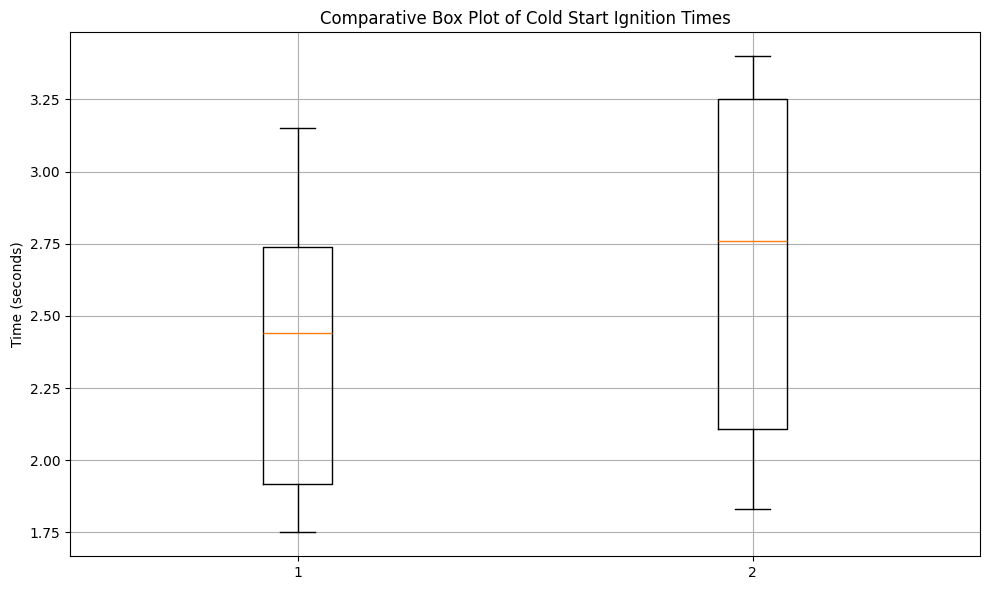

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sample_a = np.array([1.75, 1.92, 2.62, 2.35, 3.09, 3.15, 2.53, 1.91])
sample_b = np.array([1.83, 1.99, 3.13, 3.29, 2.65, 2.87, 3.40, 2.46, 1.89, 3.35])

mean_a = np.mean(sample_a)
variance_a = np.var(sample_a, ddof=1)
std_dev_a = np.std(sample_a, ddof=1)

mean_b = np.mean(sample_b)
variance_b = np.var(sample_b, ddof=1)
std_dev_b = np.std(sample_b, ddof=1)

plt.figure(figsize=(10, 6))
plt.boxplot([sample_a, sample_b])
plt.title("Comparative Box Plot of Cold Start Ignition Times")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.tight_layout()
print(mean_a, variance_a, std_dev_a, mean_b, variance_b, std_dev_b)


Question-5

Training set size: 80 samples
Testing set size: 20 samples

Degree 1 - Mean Squared Error on Test Set: 2.6148

Degree 2 - Mean Squared Error on Test Set: 2.5434

Degree 3 - Mean Squared Error on Test Set: 2.5682


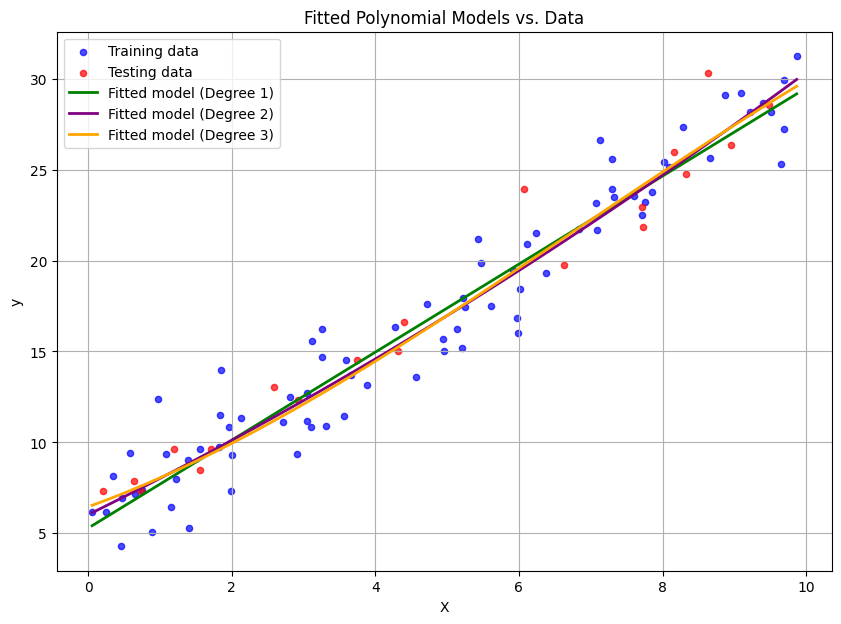


Summary of MSE scores:
Degree 1: 2.6148
Degree 2: 2.5434
Degree 3: 2.5682


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)

X = np.random.rand(100, 1) * 10
true_slope = 2.5
true_intercept = 5
y_true = true_slope * X + true_intercept

noise = np.random.normal(loc=0, scale=2, size=(100, 1))
y = y_true + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

degrees = [1, 2, 3]
models = {}
mse_scores = {}

plt.figure(figsize=(10, 7))

plt.scatter(X_train, y_train, s=20, label='Training data', alpha=0.7, color='blue')
plt.scatter(X_test, y_test, s=20, label='Testing data', color='red', alpha=0.7)

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

line_colors = ['green', 'purple', 'orange']

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    model.fit(X_train, y_train)
    models[degree] = model

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_scores[degree] = mse
    print(f"\nDegree {degree} - Mean Squared Error on Test Set: {mse:.4f}")

    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, color=line_colors[i], linewidth=2, label=f'Fitted model (Degree {degree})')

plt.title('Fitted Polynomial Models vs. Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("\nSummary of MSE scores:")
for degree, mse in mse_scores.items():
    print(f"Degree {degree}: {mse:.4f}")